In [1]:
# Importing the required libraries
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import time
import os
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import json

In [2]:
tf.__version__

'2.6.2'

In [3]:
file = open('mapping.json', 'r')
for i in file:
    mapping = json.loads(i)

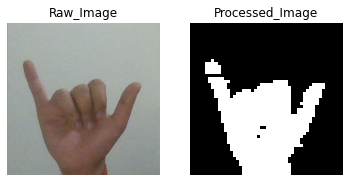

Predicted Value = Y


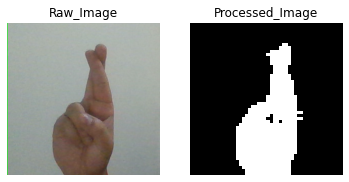

Predicted Value = D


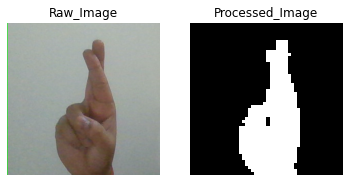

Predicted Value = R


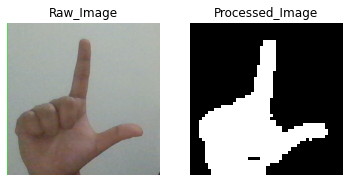

Predicted Value = L


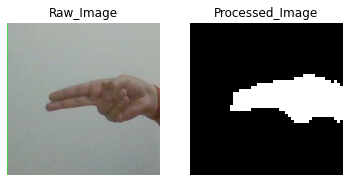

Predicted Value = H


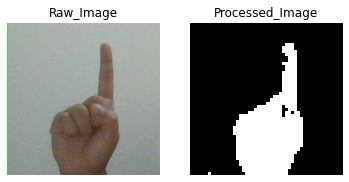

Predicted Value = D


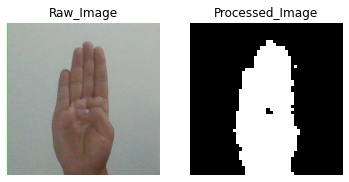

Predicted Value = B


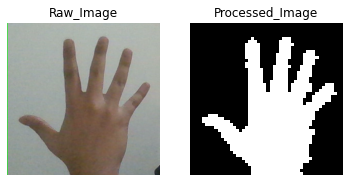

Predicted Value = 5


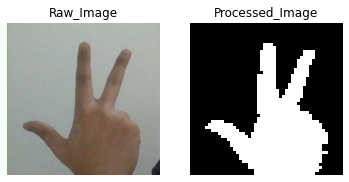

Predicted Value = 3


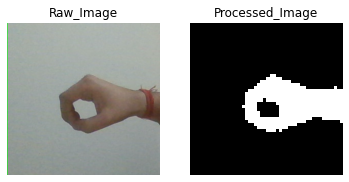

Predicted Value = 0


In [4]:
# Loading the model
model = load_model('sign-language-recognition.h5')

# Opening the Camera
capture = cv2.VideoCapture(0)
start_time = time.time()

while capture.isOpened():
    current_time = time.time()
    
    # Capturing frames from the camera
    ret, frame = capture.read()

    # Getting hand data from the rectangle sub window
    cv2.rectangle(frame, (100, 100), (400, 400), (0, 255, 0), 0)
    crop_image = frame[100:400, 100:400]
    
    # Applying Gaussian blur
    blur = cv2.GaussianBlur(crop_image, (5, 5), 0)
    
    # Changing color-space from BGR -> HSV
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

    # Creating a binary image with where white will be skin colors and rest is black
    mask2 = cv2.inRange(hsv, np.array([2, 0, 0]), np.array([20, 255, 255]))

    # Kernel for morphological transformation
    kernel = np.ones((5, 5))

    # Appling morphological transformations to filter out the background noise
    dilation = cv2.dilate(mask2, kernel, iterations=1)
    erosion = cv2.erode(dilation, kernel, iterations=1)

    # Applying Gaussian Blur and Threshold
    filtered = cv2.GaussianBlur(erosion, (3, 3), 0)
    ret, thresh = cv2.threshold(filtered, 75, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # Resizing the image to desired dimension and again apply Threshold
    resize_image = cv2.resize(thresh, [50,50], interpolation = cv2.INTER_AREA)
    ret2, thresh2 = cv2.threshold(resize_image, 60, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    cv2.imshow("Gesture", frame)
    
    # Capturing image every 5 seconds
    if current_time-start_time>=5.0:
        start_time = current_time
        test_image = cv2.merge([thresh2, thresh2, thresh2])
        test_image = img_to_array(test_image)
        test_image = test_image/255
        
        # Identifying the hand gesture
        result = model.predict(np.expand_dims(test_image, axis = 0))
        predict = mapping[str(np.argmax(result))]
        
        # Displaying the results
        fig, axs = plt.subplots(1, 2, figsize=(6, 12))
        ax=axs[0].axis("off")
        ax=axs[0].set_title('Raw_Image')
        ax=axs[0].imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))
        ax=axs[1].axis("off")
        ax=axs[1].set_title('Processed_Image')
        ax=axs[1].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
        plt.show()
        print("Predicted Value =", predict)
        
    # Closing the camera if 'q' is pressed
    if cv2.waitKey(1) == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()